In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from sklearn.decomposition import PCA
from scipy import stats

In [25]:

# Load the dataset
file_path = 'diamonds.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [27]:
df = df.drop(columns=['cut', 'color', 'clarity'])
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [28]:
# Display summary statistics
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


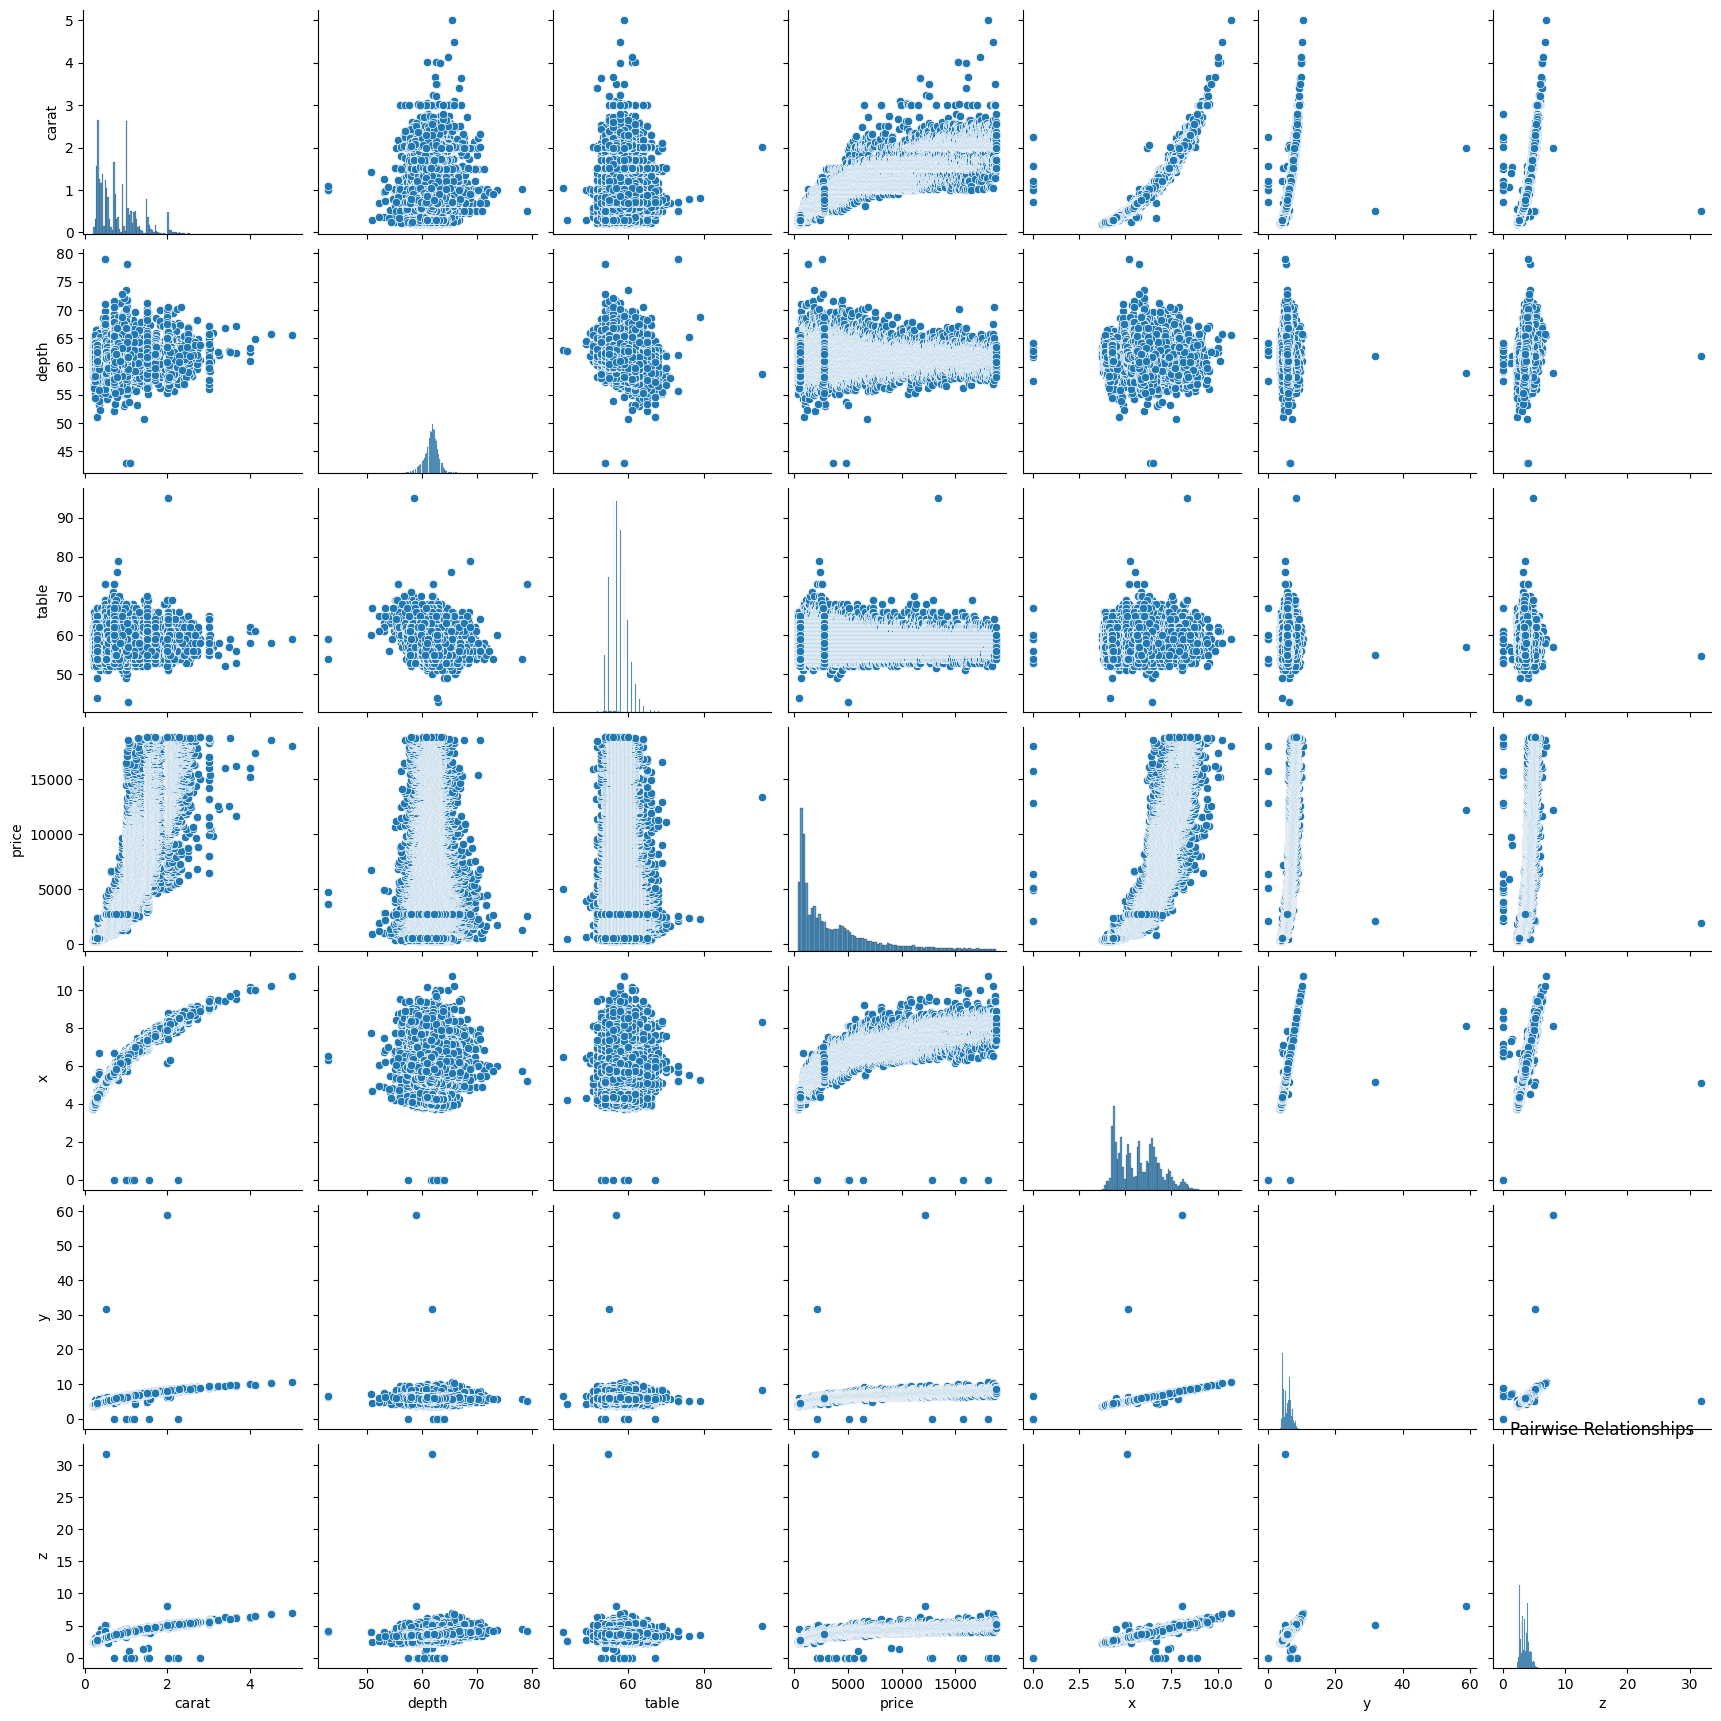

In [29]:
# Plot pair plots for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numeric_columns])
plt.title("Pairwise Relationships")
plt.show()


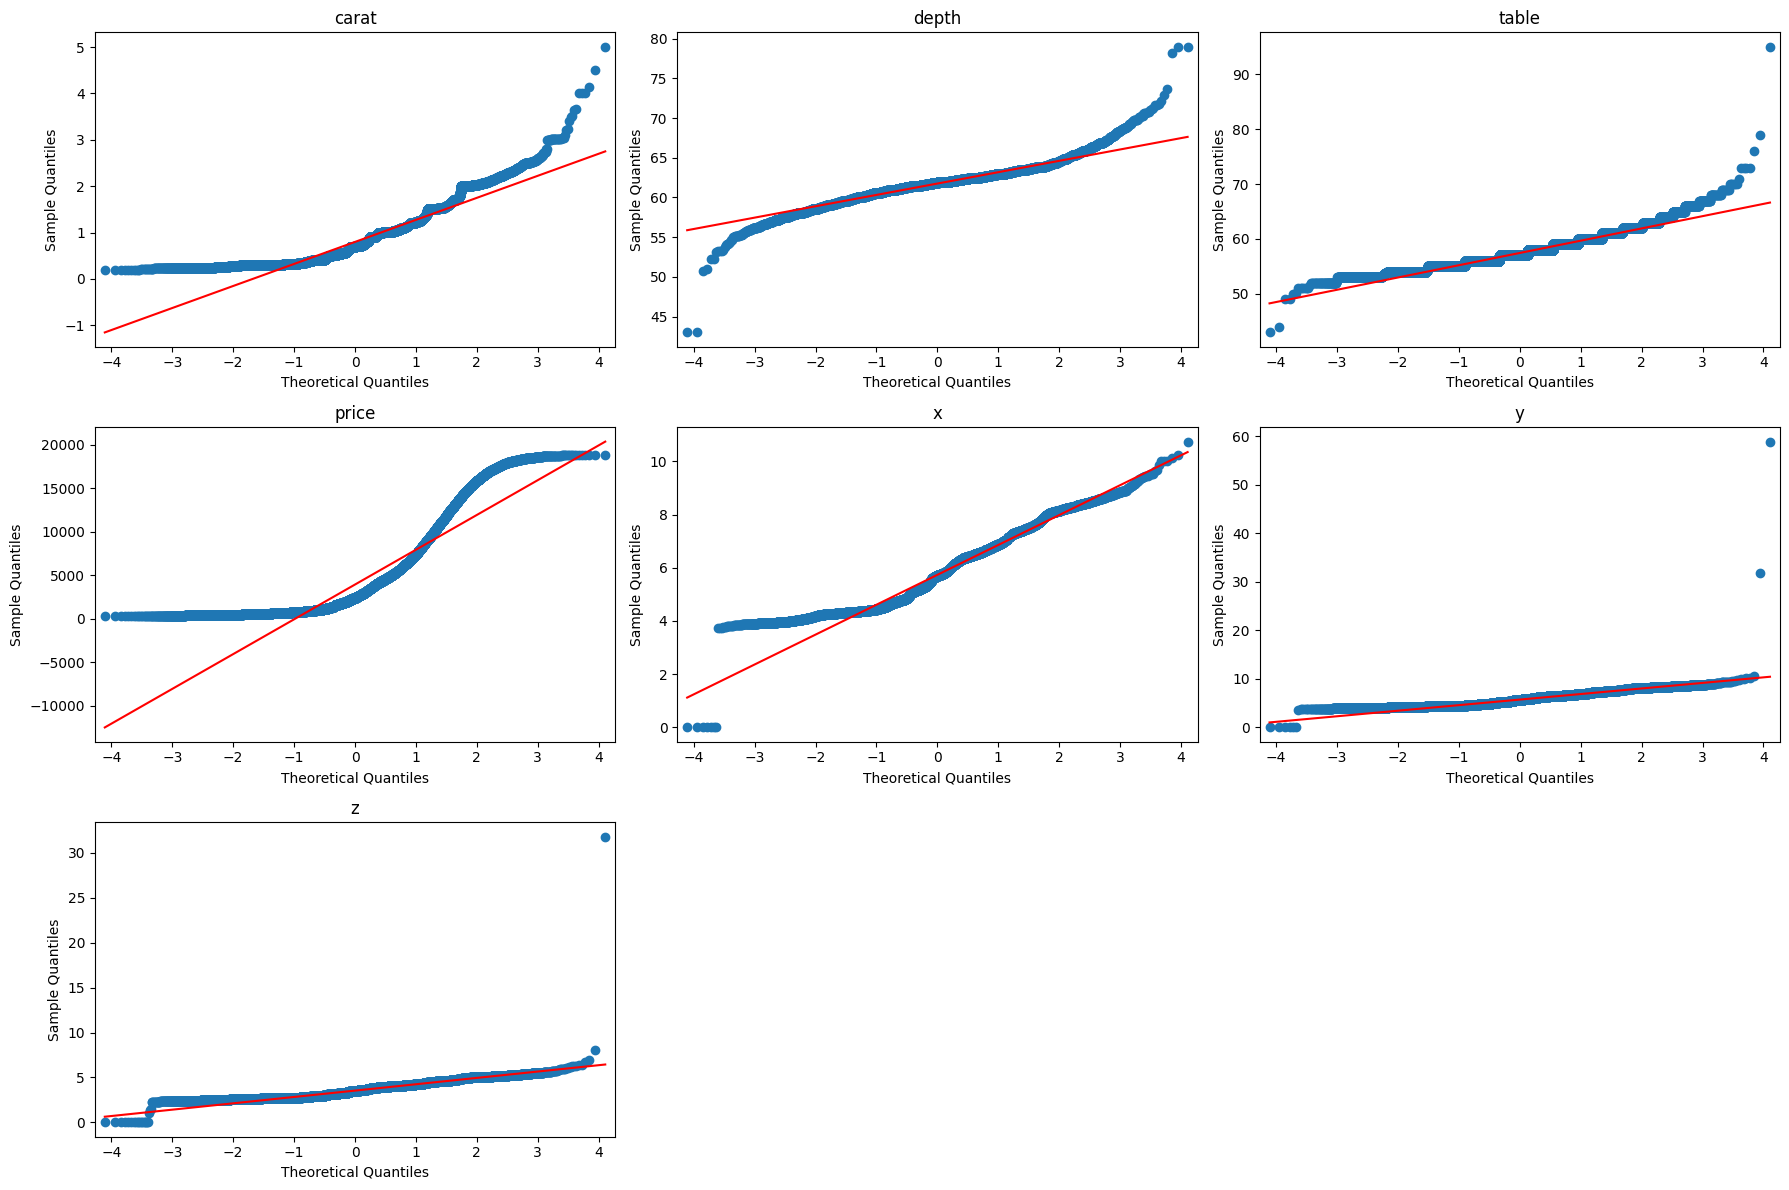

In [30]:
# Generate Q-Q plots
plt.figure(figsize=(18, 12))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    qqplot(df[col].dropna(), line='s', ax=plt.gca())
    plt.title(col)

plt.tight_layout()
plt.show()

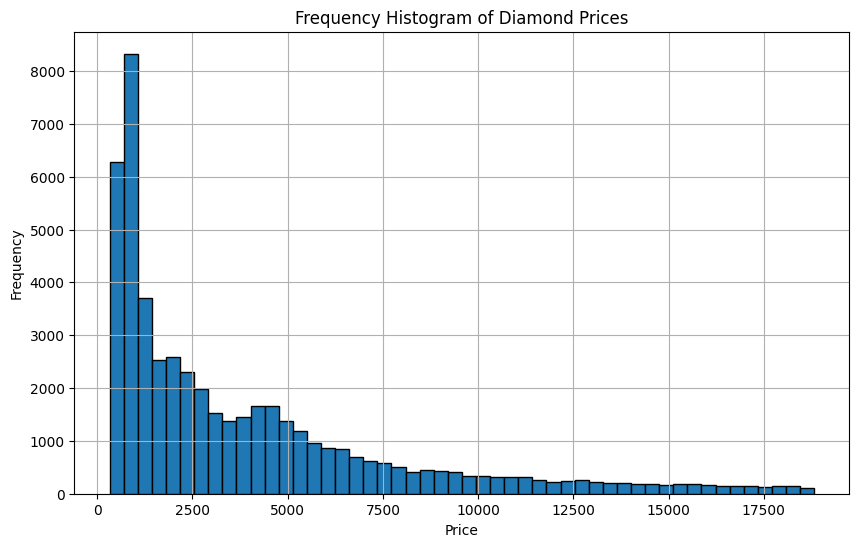

In [31]:
# plot histogram of Diamond prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Frequency Histogram of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
for col in df.columns:
    if col == "price":
        continue
    df.plot.scatter(x='price',
                      y=col)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\agasi.bekiryan\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\agasi.bekiryan\AppData\Local\Temp\ipykernel_24252\3495339671.py", line 4, in <module>
    df.plot.scatter(x='price',
  File "C:\Users\agasi.bekiryan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_core.py", line 1751, in scatter
    self,
  File "C:\Users\agasi.bekiryan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_core.py", line 951, in __call__
    )
  File "C:\Users\agasi.bekiryan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_core.py", line 1947, in _get_plot_backend
  File "C:\Users\agasi.bekiryan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_core.py", line 1877, in _load_backend
    ) from None
ImportError: matplotlib i

In [ ]:
# Plotting distributions
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i // 2, i % 2], kde=True)
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')
    axes[i // 2, i % 2].set_xlabel('Value')
    axes[i // 2, i % 2].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(df.columns), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [ ]:
# Select features and target
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

In [ ]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Plot the regression line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.show()

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
X = df.drop('price', axis=1)  # Independent variables
y = df['price']  # Dependent variable

# Add a constant to the independent variables (for intercept term)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the regression model
print(model.summary())

In [ ]:
# Standardize the features
df = (df - df.mean()) / df.std()

# Initialize PCA with the number of components you want to retain
pca = PCA(n_components=2)

# Fit PCA to the standardized data
pca.fit(df)

# Transform the data onto the first two principal components
X_pca = pca.transform(df)

# Create a DataFrame for the transformed data
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the DataFrame with the principal components and the target variable
print(df_pca.head())

In [ ]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Print cumulative explained variance
print("Cumulative explained variance with", 2, "components:", cumulative_explained_variance[-1])

In [ ]:
# Get the loadings (eigenvectors) from the PCA object
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot the circle of correlations
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(circle)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
for i, (x, y) in enumerate(loadings):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)
    plt.text(x, y, df.columns[i], fontsize=12, ha='right', va='bottom')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Circle of Correlations')
plt.grid(True)
plt.show()

In [ ]:
# Project the data onto the first two principal components
projected_data = pca.transform(df)

# Plot the projection
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data onto First Two Principal Components')
plt.grid(True)
plt.show()